In [24]:
import json
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import numpy as np

In [114]:
radar_file = "./data/261020_170423.dat"
with open(radar_file) as jsonfile:
    data = json.load(jsonfile)

In [115]:
c = 299792458 # in m/s
radar_bw = 1.5e+9 # bandwidth in hz
radar_rr = c/(2*radar_bw)
print(radar_rr)

0.09993081933333334


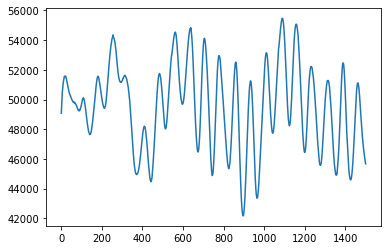

In [116]:
radar_data = data[0]['Data']
plt.plot(radar_data)

In [117]:
from scipy import signal
nfft = len(radar_data)
radar_detrended = signal.detrend(radar_data, type='linear')
radar_hann = np.hanning(nfft)*radar_detrended

In [118]:
from scipy import signal
nfft = len(radar_data)
radar_detrended = signal.detrend(radar_data, type='linear')
radar_hann = np.hanning(nfft)*radar_detrended

K = 5
radar_np = np.asarray(radar_hann)
pad_len = (K-1)*len(radar_np)
radar_pad = np.pad(radar_np, (0,pad_len), 'constant',constant_values=0)
radar_spectrum =abs(scipy.fft(radar_pad))

C:\Users\kingj\Miniconda3\envs\py3-ecmaxr\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  # Remove the CWD from sys.path while we load stuff.


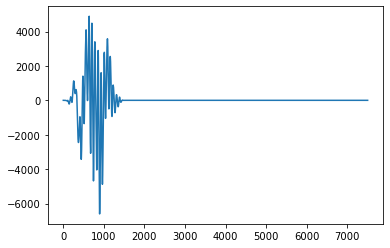

In [119]:
plt.plot(radar_pad)

In [120]:
distance = np.arange(0, len(radar_spectrum))*(radar_rr/K)
print(len(distance))
print(len(radar_spectrum))

7505
7505


In [121]:
peaks, _ = scipy.signal.find_peaks(radar_spectrum)

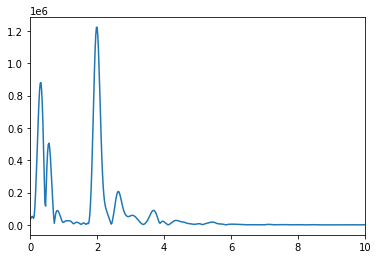

In [122]:
fig, ax = plt.subplots()
ax.plot(distance,radar_spectrum)
ax.set_xlim([0, 10])
plt.show()

In [123]:
def process_radar(data, k = 5):
    nfft = len(data)
    radar_detrended = signal.detrend(data, type='linear')
    radar_hann = np.hanning(nfft)*radar_detrended
    radar_np = np.asarray(radar_hann)
    pad_len = (k-1)*len(radar_np)
    radar_pad = np.pad(radar_np, (0,pad_len), 'constant',constant_values=0)
    radar_spectrum =abs(scipy.fft(radar_pad))
    return radar_spectrum

In [124]:
x = [process_radar(x['Data']) for x in data]
x = np.squeeze(x)

C:\Users\kingj\Miniconda3\envs\py3-ecmaxr\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


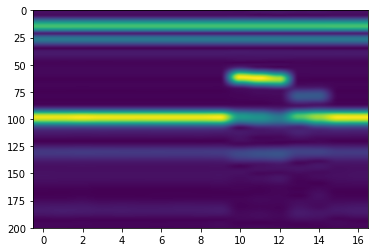

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.rot90(x))
ax.set_ylim([0, 200])
ax.set_aspect('equal')
ax.set_aspect('auto')
fig.gca().invert_yaxis()